# The Color of Noise

This is a short notebook to accompany our lecture on power laws, noise processes, and their spectra.

We'll load Numpy, Matplotlib, the Periodogram and Scipy, and set some simple defaults. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import matplotlib.pyplot as plt 

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
# plt.rcParams['font.family'] = 'Helvetica'

# ignore some warnings related to the FFT, but recommend YOU only do this once you know what those warnings are! 
import warnings
warnings.filterwarnings("ignore")


The next code block contains a function that generates noise based on power-law scaling.  We start from white noise, transform that time series to frequency space, and then create a scaling factor that is a function of the frequency (in class we'll talk about the basis of the exponent choice for the scaling).  The scaling is then applied to the transformed white noise, and then we use the inverse Fournier transform to go back to temporal space:

In [3]:
def generate_noise(exponent, size):
   
    # first generate Gaussian (white) noise from the random normal distribution
    white_noise = np.random.normal(size=size)
    
    # now, we transform that white noise using FFT into frequency space
    ft = np.fft.rfft(white_noise)
    
    # ... and we get the frequencies corresponding the transformed time series
    freqs = np.fft.rfftfreq(size)
    
    # now we generate the power-law scaling, using the np.where syntax (if the first input condition is true, we do the second input, but then apply the third input everywhere else where it isn't)
    scaling_factors = np.where(freqs == 0, 0, freqs**(exponent / 2.0)) 
    
    # apply the scaling factors we generated to the transformed white noise 
    ft_scaled = ft * scaling_factors
    
    # ... and use the inverse Fourier transform to go from scaled spectra back to time domain
    noise = np.fft.irfft(ft_scaled, n=size) # need to specify size? Hmm
    
    return noise

Let's use the function now - we'll generate 1000 'year' long noise series, passing the exponents for the scaling relationship we discussed in class: 

In [5]:
# let's generate a 1000 'year' noise sequence now for white, red, and blue noise
size = 1000

# Generate Gaussian (white) noise (exponent = 0)
white_noise = generate_noise(0, size)

# Generate red noise (exponent = -2)
red_noise = generate_noise(-2, size)

# Generate blue noise (exponent = 2)
blue_noise = generate_noise(2, size)


We'll first plot the time series that resulted from the noise-generating function:

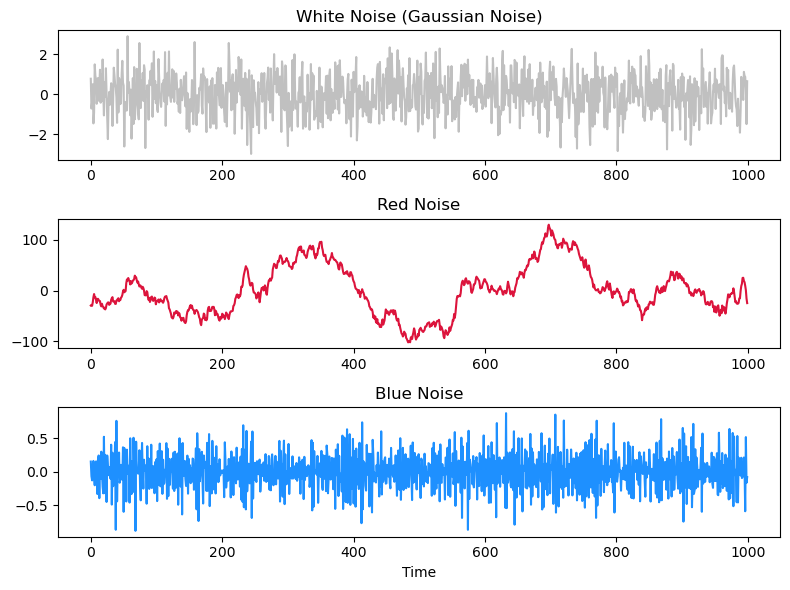

In [7]:
# Plot the noise time series
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.plot(white_noise,color='silver')
plt.title("White Noise (Gaussian Noise)")

plt.subplot(3, 1, 2)
plt.plot(red_noise, color='crimson')
plt.title("Red Noise")

plt.subplot(3, 1, 3)
plt.plot(blue_noise, color='dodgerblue')
plt.title("Blue Noise")
plt.xlabel('Time')

plt.tight_layout()
plt.show()


Now let's get the power spectra for each noise time series as a way to look at the characteristic spectra of each.  Note that we could have also gotten this directly from the function that generated the noise, since this is (in effect) how we created it in the first place! 

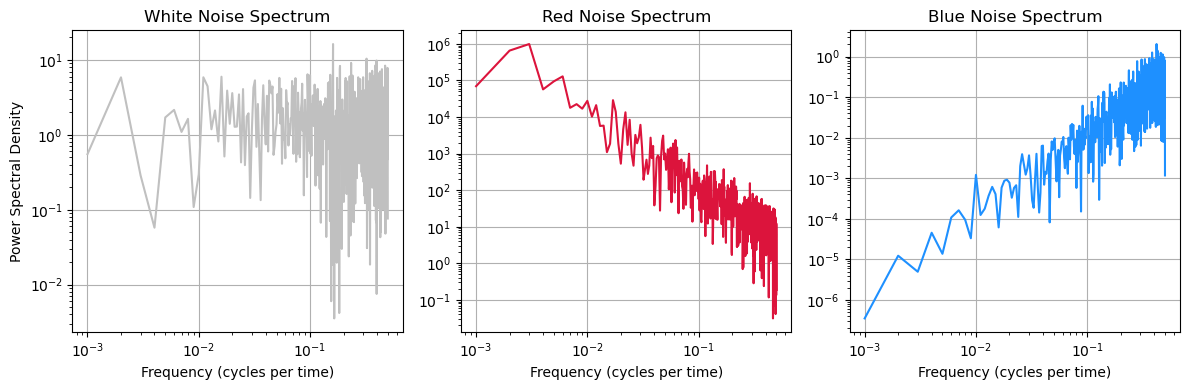

In [9]:
# Calculate power spectra using Scipy's periodogram (defaults are fine for our purposes here)
white_freqs, white_psd = periodogram(white_noise)
red_freqs, red_psd = periodogram(red_noise)
blue_freqs, blue_psd = periodogram(blue_noise)

# Plot the spectra 
plt.figure(figsize=(12, 4))

# white noise
plt.subplot(1, 3, 1)
plt.loglog(white_freqs[1:], white_psd[1:],color='silver')
plt.title("White Noise Spectrum")
plt.xlabel("Frequency (cycles per time)")
plt.ylabel("Power Spectral Density")
plt.grid(True)

# red noise
plt.subplot(1, 3, 2)
plt.loglog(red_freqs[1:], red_psd[1:], color='crimson')
plt.title("Red Noise Spectrum")
plt.xlabel("Frequency (cycles per time)")
plt.grid(True)

# blue noise
plt.subplot(1, 3, 3)
plt.loglog(blue_freqs[1:], blue_psd[1:], color='dodgerblue')
plt.title("Blue Noise Spectrum")
plt.xlabel("Frequency (cycles per time)")
plt.grid(True)

plt.tight_layout()
plt.show()
